Cifar10 datasetet

In [1]:
import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [2]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
y_test, y_train = y_test.ravel(), y_train.ravel() # flatten the labels, 'ravel' är liknande 'flatten'
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))

In [6]:
import pandas as pd
df = pd.DataFrame(y_train)
df[0].unique()

array([6, 9, 4, 1, 2, 7, 8, 3, 5, 0], dtype=uint8)

In [8]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
labels_dict = {i: label for i, label in enumerate(labels)}

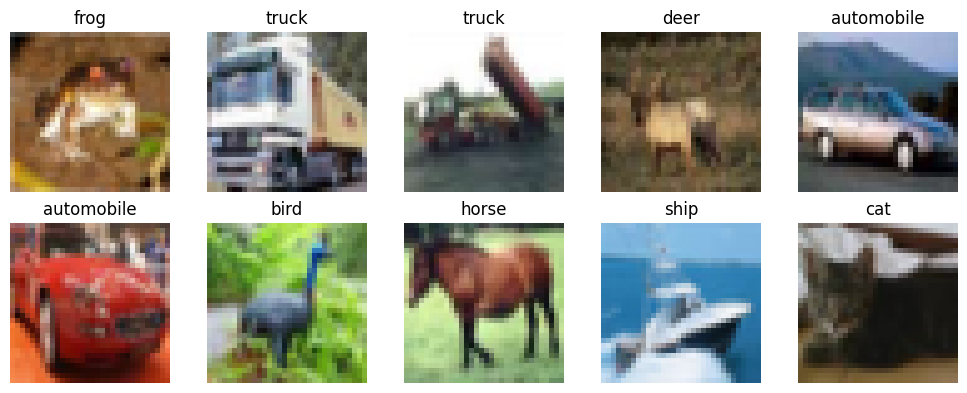

In [10]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i])
    ax.set_title(labels_dict[y_train[i]])
    ax.axis('off')
fig.tight_layout()

In [11]:
scaled_X_train = X_train.astype("float32") / 255
scaled_X_test = X_test.astype("float32") / 255

In [12]:
from keras import layers

def CNN_model(learning_rate=0.001, dropout_rate=0.5, kernels=[32,64]):
    adam = keras.optimizers.Adam(learning_rate=learning_rate)
    model = keras.models.Sequential(name="CNN")
    for kern in kernels:
        conv_layer = layers.Conv2D(filters=kern, kernel_size=3, activation='relu', kernel_initializer="he_normal", input_shape=(X_train.shape[1:]))
        model.add(conv_layer)
        model.add(layers.MaxPooling2D(pool_size=2, strides=2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(256, activation='relu', kernel_initializer="he_normal"))
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
model = CNN_model(0.001, 0.5, [32, 64, 32])
model.summary()

c:\Users\danie\Documents\GitHub\Deep-Learning-Daniel-Claesson\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,450 (286.91 KB)

 Trainable params: 73,450 (286.91 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

early_stopper = EarlyStopping(monitor='val_loss', patience=15, verbose=0)

model.fit(scaled_X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopper])


Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2479 - loss: 1.9918 - val_accuracy: 0.4439 - val_loss: 1.4918
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4187 - loss: 1.5608 - val_accuracy: 0.5195 - val_loss: 1.3331
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4900 - loss: 1.4050 - val_accuracy: 0.5707 - val_loss: 1.1990
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5344 - loss: 1.2922 - val_accuracy: 0.6037 - val_loss: 1.1254
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5617 - loss: 1.2230 - val_accuracy: 0.5957 - val_loss: 1.1339
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5786 - loss: 1.1663 - val_accuracy: 0.6212 - val_loss: 1.0731
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5879 - loss: 1.1375 - val_accuracy: 0.6447 - val_loss: 1.0251
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6026 - loss: 1

In [15]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.315900,1.813490,0.4439,1.491782
1,0.439200,1.519200,0.5195,1.333107
2,0.497325,1.382978,0.5707,1.199020
3,0.536775,1.282126,0.6037,1.125388
4,0.560825,1.223472,0.5957,1.133894


In [16]:
def plot_metrics(df_history, style="-"):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    metrics = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, metric in zip(axes, metrics):
        df_history.plot(y=metric, xlabel="Epochs",
                        ylabel=metric[0], title=metric[0],
                        ax=ax, style=style)

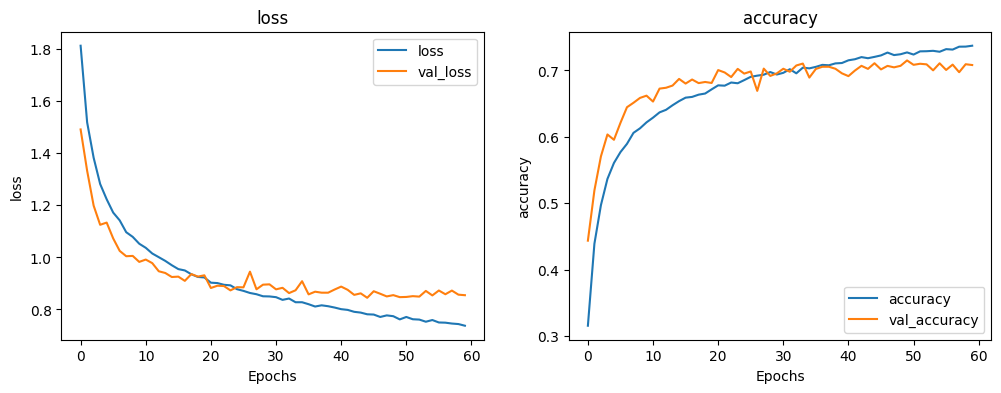

In [17]:
plot_metrics(metrics)

Gör en ny early stopper:

In [30]:
early_stopper = EarlyStopping(monitor="val_loss", patience=5, mode="min", restore_best_weights=True)

def evaluate_model(**kwargs):
    model = CNN_model(**kwargs)
    model.fit(scaled_X_train, y_train, epochs=25, batch_size=32, validation_split=1/6, callbacks=[early_stopper])
    metrics = pd.DataFrame(model.history.history)
    val_acc = metrics["val_accuracy"].iloc[-1]
    return val_acc

In [31]:
import numpy as np

dropout_accuracies = {}
for drop_rate in np.arange(.1, .6, .1):
    dropout_accuracies[drop_rate] = evaluate_model(dropout_rate=drop_rate)

Epoch 1/25
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3967 - loss: 1.6862 - val_accuracy: 0.5955 - val_loss: 1.1509
Epoch 2/25
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6244 - loss: 1.0648 - val_accuracy: 0.6591 - val_loss: 0.9782
Epoch 3/25
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6929 - loss: 0.8811 - val_accuracy: 0.6776 - val_loss: 0.9320
Epoch 4/25
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7447 - loss: 0.7381 - val_accuracy: 0.6853 - val_loss: 0.9362
Epoch 5/25
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7810 - loss: 0.6324 - val_accuracy: 0.7049 - val_loss: 0.8875
Epoch 6/25
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8210 - loss: 0.5030 - val_accuracy: 0.6865 - val_loss: 0.9827
Epoch 7/25
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8522 - loss: 0.4211 - val_accuracy: 0.7129 - val_loss: 0.9634
Epoch 8/25
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8846 - loss: 0.3348 - 

In [32]:
model_final = CNN_model(dropout_rate=.2)
model_final.fit(scaled_X_train, y_train, epochs=20)

c:\Users\danie\Documents\GitHub\Deep-Learning-Daniel-Claesson\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4419 - loss: 1.5414
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6463 - loss: 1.0056
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7108 - loss: 0.8339
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7583 - loss: 0.6964
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7932 - loss: 0.5914
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8249 - loss: 0.4983
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8510 - loss: 0.4302
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8748 - loss: 0.3616
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8919 - loss: 0.3031
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9119 - loss: 0.2580
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9171 - loss: 0.2342
Epoch 12/20
1563/1563 ━━━━━━━━